In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt

from glob import glob 
from itertools import cycle
import librosa 
import librosa.display 
import IPython.display as ipd
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [2]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')
ipd.Audio(audio_files[3])


Librosa er et biblotek for musikk og lydanalyse

In [3]:
y1, samplerate1 = librosa.load(audio_files[3])
y2, samplerate2 = librosa.load(audio_files[4])
print("samplerate: " + str(samplerate1))
print(f'shape: {y1.shape}')

samplerate: 22050
shape: (80196,)


# Visualiseirng
For å enkelt kunne visualisere data kan man plassere lydfilen (som er en array) i en panda dataframe. Deretter plotte denne. Det plottes to grafer der samme setning blir uttalt med ulikt tonefall. Det er tydelig forskjell mellom grafene.

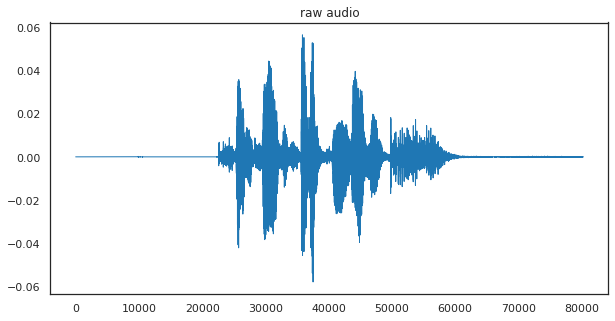

In [4]:
pd.Series(data=y1).plot(figsize=(10,5), lw=1, title="raw audio")
plt.show()

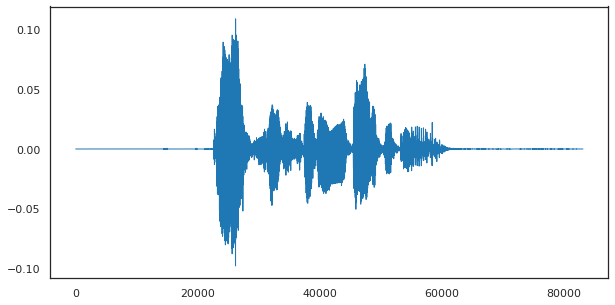

In [5]:
pd.Series(data=y2).plot(figsize=(10,5), lw=1)
plt.show()

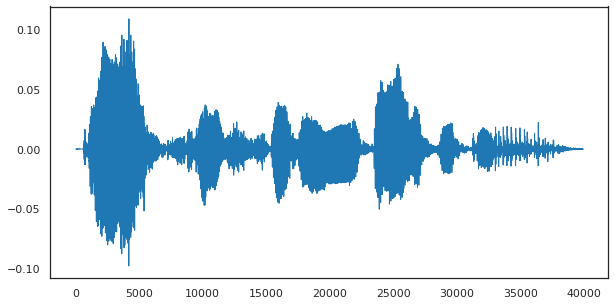

In [11]:
y2_trimmed, _ = librosa.effects.trim(y2, top_db=40)
pd.Series(data=y2_trimmed).plot(figsize=(10,5), lw=1)
plt.show()

# Audi features
## Temporal scope
Hvor mye lyd vi trenger for å få tak i informasjon
 - umiddelbart (ca 50ms)
 - Segment-lv (neon sekunder)
 - Global (Kombinerer de andre)
## Musikalsk aspelt
 - Takt
 - harmony
 - pitch
 - melodilinje
 ## Signal domain
 Den viktigste for ML
 - Time domain - Kommer fra bølgeformen av lyden
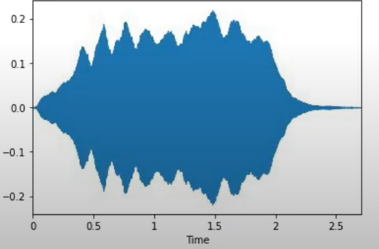
 - Frequeny domain 
 Viser alle frekvensens som er med i lyden. Kan finnes ved å fourirer transformere tidsdomenet. 
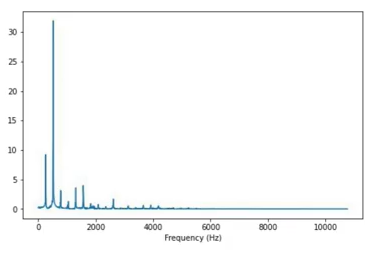

Bruker fourier transformasjon for å herzt per tid istedenfor decibel. Dette kan plottes i et spektrogram

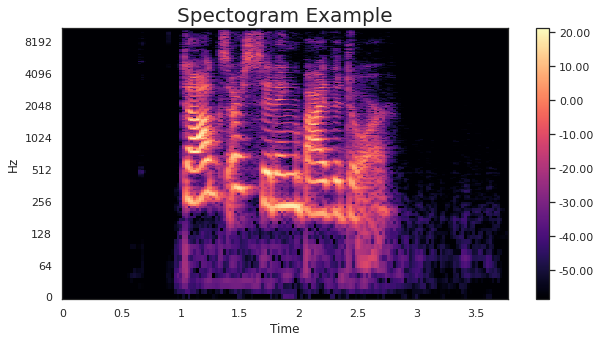

In [7]:
ft = librosa.stft(y2)
S = librosa.amplitude_to_db(np.abs(ft))
S.shape

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Melspektrogram er et melodisiøst spektrogram som kun viser de frekvenser vi mennesker er kapable til å høre. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.11079435e-05
 7.93689196e-06 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


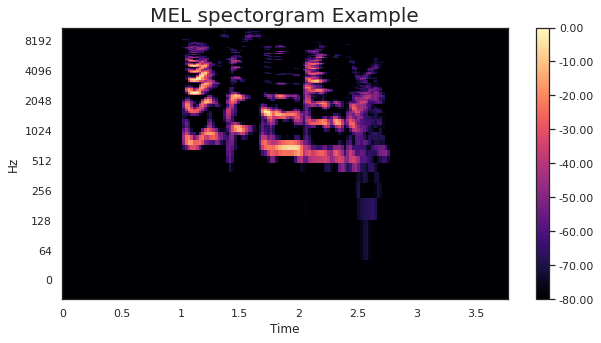

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [8]:
mel_spec = librosa.feature.melspectrogram(y2,n_mels=128, sr=samplerate2)
mel_spec_S = librosa.amplitude_to_db(np.abs(mel_spec), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(mel_spec_S,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('MEL spectorgram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

mel_spec_S